In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
def split_sequence(sequence, n_steps):
  x = list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    if end_ix > len(sequence) - 1:
      break
    seq_x = sequence[i:end_ix]
    x.append(seq_x)
  return np.array(x)

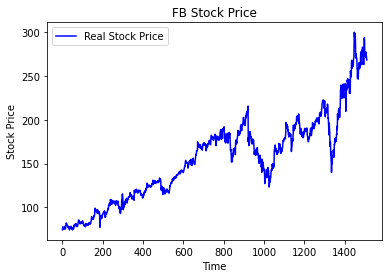

1511
1259
252


In [ ]:
name = 'FB'
data = pd.read_csv(name + '.csv')
data = data.iloc[:,1:2].values
plt.plot(data, color = 'blue', label = 'Real Stock Price')
plt.title(name + ' Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
length = data.shape[0]
train_len = int(length / 6 * 5)
test_len = length - train_len
real_train_prices = data[1:train_len + 1]
real_test_prices = data[train_len + 1:length]
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
print(length)
print(train_len)
print(test_len)

In [ ]:
X_train = data[0:train_len]
y_train = data[1:train_len + 1]
X_train = np.reshape(X_train, (train_len, 1, 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=64, activation='sigmoid', input_shape=(None, 1)))
model.add(Dense(units=1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0283
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0213
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0185
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 13/200
40/40 [=================

In [ ]:
X_test = data[train_len + 1:length]
X_test = np.reshape(X_test, (test_len - 1, 1, 1))
predicted_test_prices = model.predict(X_test)
predicted_test_prices = scaler.inverse_transform(predicted_test_prices)

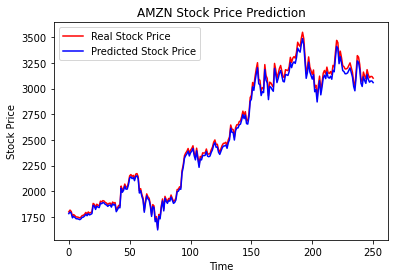

In [ ]:
plt.plot(real_test_prices, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_test_prices, color = 'blue', label = 'Predicted Stock Price')
plt.title(name + ' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

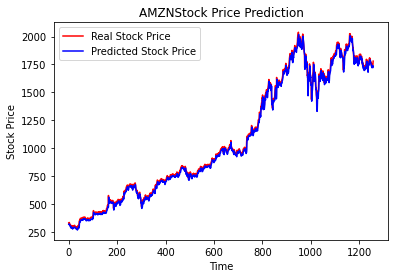

In [ ]:
predicted_train_prices = model.predict(X_train)
predicted_train_prices = scaler.inverse_transform(predicted_train_prices)

# Visualising the results
plt.plot(real_train_prices, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_train_prices, color = 'blue', label = 'Predicted Stock Price')
plt.title(name + 'Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
test_mse = math.sqrt(mean_squared_error(real_test_prices, predicted_test_prices))
train_mse = math.sqrt(mean_squared_error(real_train_prices, predicted_train_prices))
print(test_mse)
print(train_mse)

34.367457520905226
28.419655118812916
